In [1]:
import pandas as pd

# Load the dataset
url = "./dataset/page-blocks.data.csv"
columns = ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(data.head())

   height  length   area  eccen  p_black  p_and  mean_tr  blackpix  blackand  \
5       7      35  1.400  0.400    0.657   2.33       14        23         6   
6       7      42  1.167  0.429    0.881   3.60       18        37         5   
6      18     108  3.000  0.287    0.741   4.43       31        80         7   
5       7      35  1.400  0.371    0.743   4.33       13        26         3   
6       3      18  0.500  0.500    0.944   2.25        9        17         4   

   wb_trans  
5         1  
6         1  
6         1  
5         1  
6         1  


In [2]:
# Summary statistics
print(data.describe())

            height         length         area        eccen      p_black  \
count  5473.000000    5473.000000  5473.000000  5473.000000  5473.000000   
mean     89.568244    1198.405628    13.753977     0.368642     0.785053   
std     114.721758    4849.376950    30.703737     0.177757     0.170661   
min       1.000000       7.000000     0.007000     0.052000     0.062000   
25%      17.000000     114.000000     2.143000     0.261000     0.679000   
50%      41.000000     322.000000     5.167000     0.337000     0.803000   
75%     107.000000     980.000000    13.625000     0.426000     0.927000   
max     553.000000  143993.000000   537.000000     1.000000     1.000000   

             p_and       mean_tr      blackpix     blackand     wb_trans  
count  5473.000000   5473.000000   5473.000000  5473.000000  5473.000000  
mean      6.219278    365.930751    741.108167   106.662891     1.202631  
std      69.079021   1270.333082   1881.504302   167.308362     0.721470  
min       1.000

# Watermark Function

In [3]:
def add_watermark(ax, text):
    ax.text(0.5, 0.5, text, alpha=0.3, fontsize=50, color='gray',
            rotation=0, ha='center', va='center', transform=ax.transAxes)

# Bivariate EDA

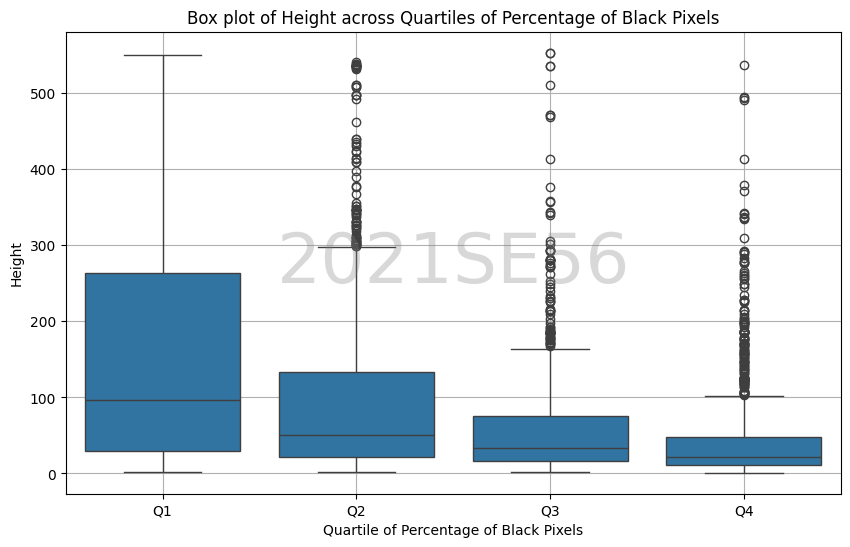

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Divide 'Percentage of Black Pixels' into quartiles
data['P_BLACK_Quartile'] = pd.qcut(data['p_black'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='P_BLACK_Quartile', y='height', data=data)
plt.title('Box plot of Height across Quartiles of Percentage of Black Pixels')
plt.xlabel('Quartile of Percentage of Black Pixels')
plt.ylabel('Height')
plt.grid(True)
add_watermark(plt.gca(), '2021SE56')
plt.show()

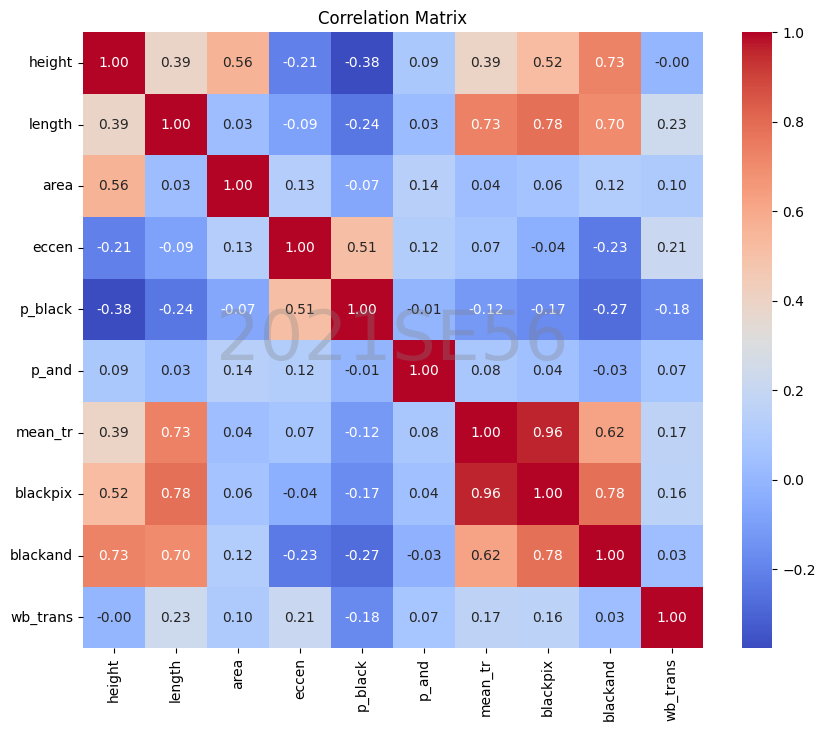

In [5]:
# Correlation matrix
correlation_matrix = data.drop('P_BLACK_Quartile', axis=1).corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
add_watermark(plt.gca(), '2021SE56')
plt.show()


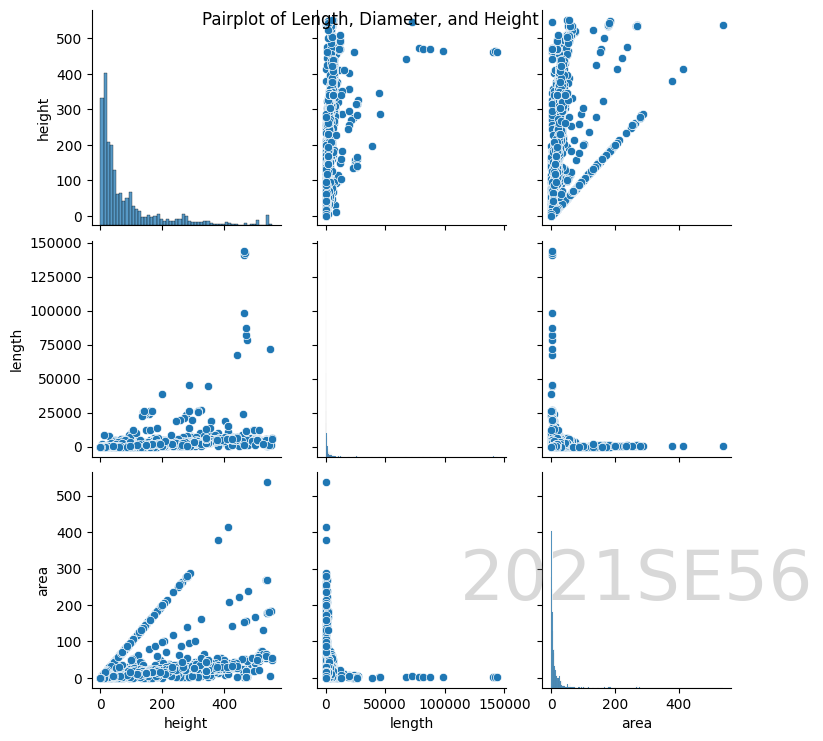

In [6]:
sns.pairplot(data[['height', 'length', 'area']])
plt.suptitle('Pairplot of Length, Diameter, and Height')
add_watermark(plt.gca(), '2021SE56')
plt.show()